In [73]:
pip install notebook --upgrade

Requirement already up-to-date: notebook in /opt/anaconda3/lib/python3.7/site-packages (6.1.4)
Note: you may need to restart the kernel to use updated packages.


In [74]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [75]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [76]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


# Imort of reqiured packages 

we import these packges in order to fulfillment this phase which are listed below

In [2]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize , sent_tokenize
from nltk.text import Text
!pip install imbalanced-learn
import imblearn
import nltk
nltk.download("popular")
import seaborn as sns
import ast
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.svm import SVC

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

#import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix
from wordcloud import WordCloud,STOPWORDS


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\yasme\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\yasme\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\yasme\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\yasme\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\yasme\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

# Imort of the dataset 

The metadata of the data :
    
TITLE: Title of the research article
ABSTRACT: Abstract of the research article
Computer Science: Whether article belongs to topic computer science (1/0)
Physics: Whether article belongs to topic physics (1/0)
Mathematics: Whether article belongs to topic Mathematics (1/0)
Statistics: Whether article belongs to topic Statistics(1/0)
Quantitative Biology:Whether article belongs to topic Quantitative Biology (1/0)
Quantitative Finance: Whether article belongs to topic Quantitative Finance (1/0)
    
and as we choose to classify the data based in one class (wether belong to computer Science or not)
we will drop the other topic column.

In [26]:
data= pd.read_csv('CleanedArticles.csv')
data.head()

Unnamed: 0  ID                                              TITLE  \
0           0   1  ['reconstruct', 'subject', 'specif', 'effect',...   
1           1   2           ['rotat', 'invari', 'neural', 'network']   
2           2   3  ['spheric', 'polyharmon', 'poisson', 'kernel',...   
3           3   4  ['finit', 'element', 'approxim', 'stochast', '...   
4           4   5  ['compar', 'studi', 'discret', 'wavelet', 'tra...   

                                            ABSTRACT  Computer Science  \
0  ['predict', 'model', 'allow', 'subject', 'spec...                 1   
1  ['rotat', 'invari', 'translat', 'invari', 'gre...                 1   
2  ['introduc', 'develop', 'notion', 'spheric', '...                 0   
3  ['stochast', 'landau', 'lifshitz', 'gilbert', ...                 0   
4  ['fourier', 'transform', 'infra', 'red', 'ftir...                 1   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   
3        0            1           0                     0   
4        0            0           1                     0   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

We notice that the reasersh may be belong to more than one area and we want to know what the maximum number of area that the reashres may belong to. 

In [4]:
data['numOfFields'] = 0;
i=0
while( i<len(data)):
    data['numOfFields'][i]=data['Computer Science'][i]+ data['Physics'][i] + data['Mathematics'][i]+data['Statistics'][i]+data['Quantitative Biology'][i]+data['Quantitative Finance'][i]
    i+=1


D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


maximum number of area that the reashres may belong to is 3

In [5]:
data['numOfFields'].max()

3

and as we choose to classify the data based in one class (wether belong to computer science or not)
we will drop the other topic column.

In [6]:
data.drop(['Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance','numOfFields'], axis=1, inplace=True)

# The Distribution of the classes 

we can notice form the figure below that the data is biased toward the other area(not computer science) not balance.

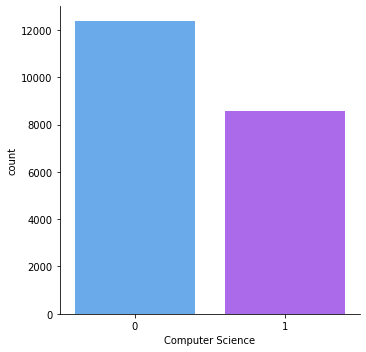

In [7]:
import seaborn as sns
sns.catplot(x="Computer Science", kind="count", palette="cool", data=data)

as the data is biased toward the computer science we need to make the data balance so we decide to do undersampling to the data. 

In [8]:
# example of random undersampling to balance the class distribution

# define dataset
X = data[['TITLE' , 'ABSTRACT']]
y = data['Computer Science']
# summarize class distribution
print()
print("The data distrubtion before undersampling :")
print(Counter(y))
print()
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X, y)
# summarize class distribution
print("The data distrubtion after undersampling :")
print(Counter(y_over))
print()



The data distrubtion before undersampling :
Counter({0: 12378, 1: 8594})

The data distrubtion after undersampling :
Counter({0: 8594, 1: 8594})



Now the data is balance as we have equal sample form the 2 class

In [29]:
df = pd.DataFrame(X_over, columns = ['TITLE', 'ABSTRACT']) 

In [30]:
df['Computer_Science'] = y_over

In [31]:
df.reset_index()

index                                              TITLE  \
0          0  ['akari', 'irc', 'asteroid', 'flux', 'catalogu...   
1          1  ['glow', 'gener', 'flow', 'invert', 'x', 'conv...   
2          2  ['asymptot', 'behaviour', 'christoffel', 'func...   
3          3  ['constraint', 'growth', 'spin', 'supermass', ...   
4          4  ['intuit', 'fail', 'assess', 'condit', 'risk',...   
...      ...                                                ...   
17183  17183  ['faith', 'invers', 'gener', 'model', 'effect'...   
17184  17184  ['social', 'network', 'analysi', 'oper', 'rese...   
17185  17185  ['quickcast', 'fast', 'effici', 'inter', 'data...   
17186  17186  ['contemporari', 'machin', 'learn', 'guid', 'p...   
17187  17187  ['analys', 'soccer', 'game', 'cluster', 'conce...   

                                                ABSTRACT  Computer_Science  
0      ['akari', 'irc', 'sky', 'survey', 'provid', 't...                 0  
1      ['flow', 'base', 'gener', 'model', 'dinh', 'et...                 0  
2      ['present', 'famili', 'mutual', 'orthogon', 'p...                 0  
3      ['present', 'second', 'cadenc', 'observ', 'ngc...                 0  
4      ['recent', 'educ', 'initi', 'ted', 'ed', 'publ...                 0  
...                                                  ...               ...  
17183  ['infer', 'amort', 'method', 'share', 'inform'...                 1  
17184  ['studi', 'u', 'oper', 'research', 'industri',...                 1  
17185  ['larg', 'inter', 'datacent', 'transfer', 'cru...                 1  
17186  ['machin', 'learn', 'find', 'increasingli', 'b...                 1  
17187  ['present', 'new', 'approach', 'identifi', 'si...                 1  

[17188 rows x 4 columns]

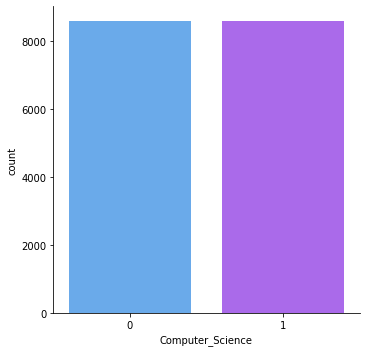

In [12]:

sns.catplot(x="Computer_Science", kind="count", palette="cool", data=df)

The data is balance now.

# Abstract word cloud

we display this plot inorder to figur out which words that frequncley appears in the abstrct of Computer Science research as our concern is the Computer Science research.

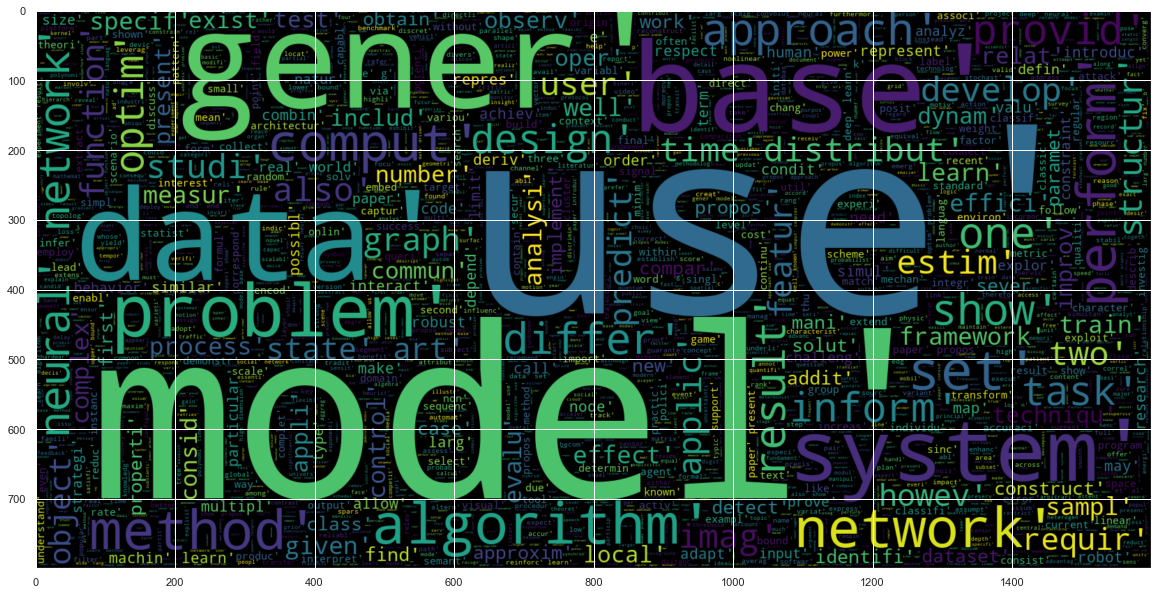

In [88]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.Computer_Science == 1].ABSTRACT))
plt.imshow(wc , interpolation = 'bilinear')

# Title word cloud

we display this plot inorder to figur out which words that frequncley appears in the abstrct of Computer Science research as our concern is the Computer Science research.

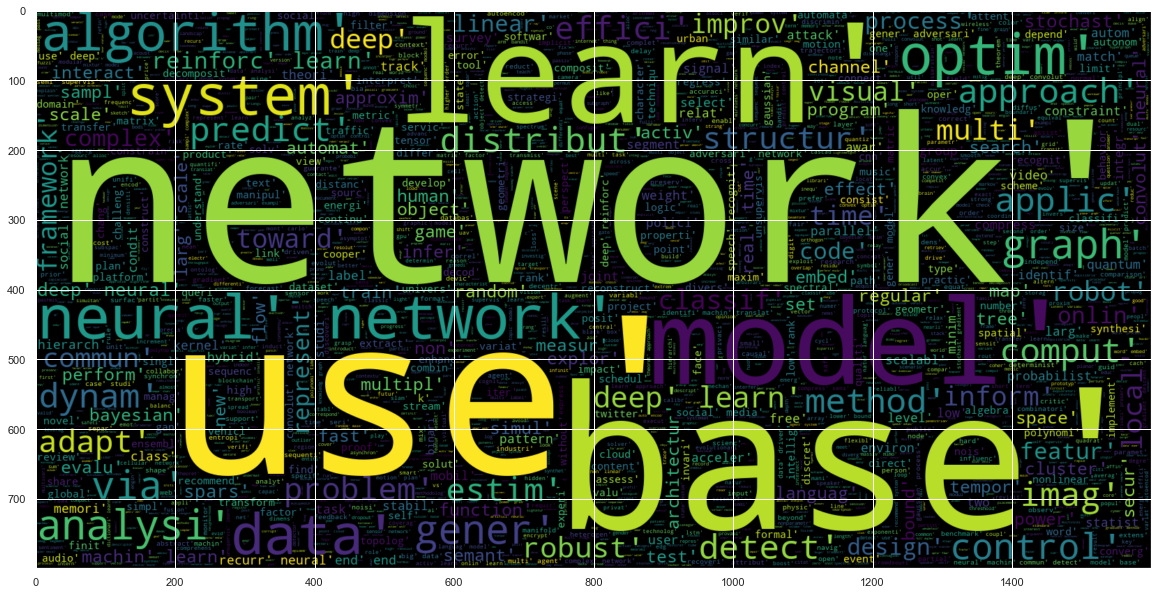

In [89]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.Computer_Science == 1].TITLE))
plt.imshow(wc , interpolation = 'bilinear')

now we will strat the main part of this project 

Our plan is first we will work in classiffiction base in Abstract of the research then classiffiction base in Title of the research then the combination of them  

# 1- classifiction based in 'Abstract'

# 1.1 Dataset preparation

first we return the word in abstract and title that toknize to be sentences form in as the model that we ues to classifiy need sentences not list of word

In [32]:
for ind in df.index:
    x = ast.literal_eval(df['ABSTRACT'][ind])
    s = ""
   
    for t in x:
        s = s+t+" "
    df['ABSTRACT'][ind] = s

D:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [35]:
df

TITLE  \
0      akari irc asteroid flux catalogu updat diamet ...   
1                     glow gener flow invert x convolut    
2      asymptot behaviour christoffel function unit b...   
3      constraint growth spin supermass black hole hi...   
4      intuit fail assess condit risk exampl frog riddl    
...                                                  ...   
17183       faith invers gener model effect amort infer    
17184  social network analysi oper research industri ...   
17185  quickcast fast effici inter datacent transfer ...   
17186  contemporari machin learn guid practition phys...   
17187              analys soccer game cluster conceptor    

                                                ABSTRACT  Computer_Science  
0      akari irc sky survey provid twenti thousand th...                 0  
1      flow base gener model dinh et al conceptu attr...                 0  
2      present famili mutual orthogon polynomi unit b...                 0  
3      present second cadenc observ ngc chimera instr...                 0  
4      recent educ initi ted ed publish popular brain...                 0  
...                                                  ...               ...  
17183  infer amort method share inform across multipl...                 1  
17184  studi u oper research industri system engin or...                 1  
17185  larg inter datacent transfer crucial cloud ser...                 1  
17186  machin learn find increasingli broad applic ph...                 1  
17187  present new approach identifi situat behaviour...                 1  

[17188 rows x 3 columns]

we do the spliting of the data : train and test and we transofrm the classes.

In [91]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['ABSTRACT'], df['Computer_Science'])

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

# 1.2. Feature Engineering

# 1.2.1 Count Vectors as features

In [92]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df['ABSTRACT'],)



# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [93]:
word_freq_df = pd.DataFrame(xtrain_count.toarray(), columns=count_vect.get_feature_names())
top_words_df = pd.DataFrame(word_freq_df.sum()).sort_values(0, ascending=False)

This is a list contian each word in abstract and where it's appear in which row 

In [94]:
word_freq_df[:3]

a  aa  aaa  aaai  aabb  aact  aad  aae  aah  aakn  ...  über  überblick  \
0  0   0    0     0     0     0    0    0    0     0  ...     0          0   
1  0   0    0     0     0     0    0    0    0     0  ...     0          0   
2  0   0    0     0     0     0    0    0    0     0  ...     0          0   

   ülger  čadek  čech  černý  šidák  šumenjak  šverák  šámal  
0      0      0     0      0      0         0       0      0  
1      0      0     0      0      0         0       0      0  
2      0      0     0      0      0         0       0      0  

[3 rows x 30950 columns]

This list contin the most frequent word in abstract, displyes in Descending order

In [95]:
top_words_df

0
model        11526
use          11154
method        7278
data          7258
network       6854
...            ...
hajiaghayi       0
halfcheetah      0
halfduplex       0
halfin           0
šámal            0

[30950 rows x 1 columns]

In [96]:
ds = top_words_df[:15]
sns.set(rc={'figure.figsize':(15,15)})

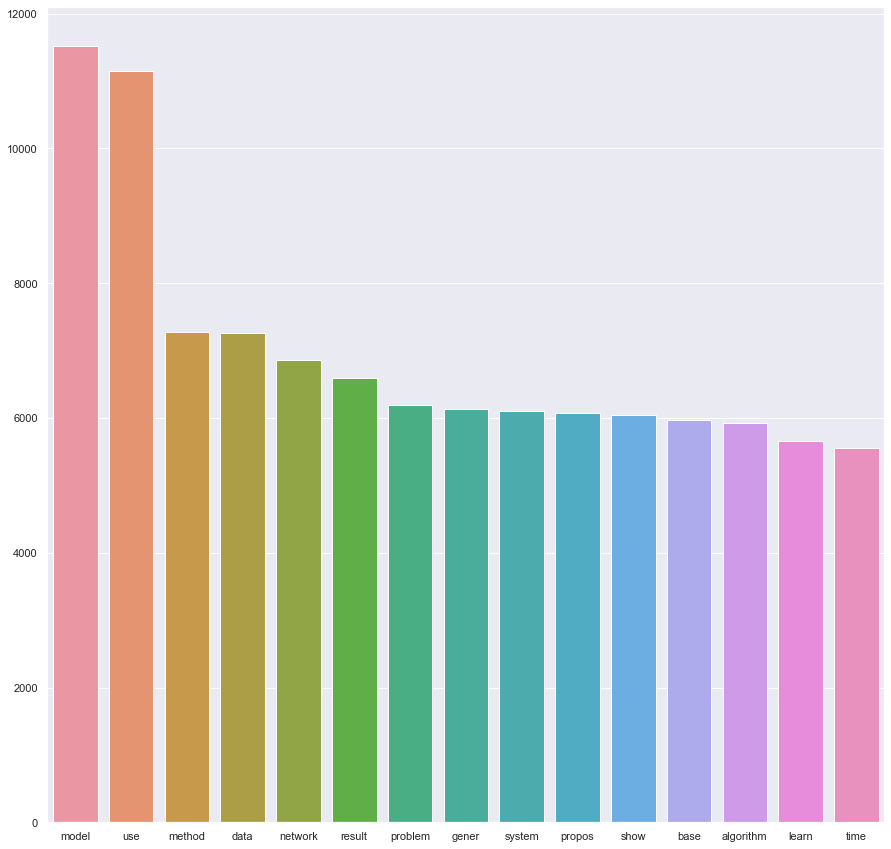

In [97]:
sns.barplot(x=list(ds.index),y=list(ds[0]))


plot of the most frequnet word with the number of frequency.

# 1.2.2 TF-IDF Vectors as features

a. Word Level TF-IDF : Matrix representing tf-idf scores of every term in different documents     
b. N-gram Level TF-IDF : N-grams are the combination of N terms together. This Matrix representing tf-idf     scores of N-grams            
      c. Character Level TF-IDF : Matrix representing tf-idf scores of character level n-grams in the corpus    

In [98]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['ABSTRACT'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(df['ABSTRACT'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(df['ABSTRACT'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:501: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


# 1.2.3 Text / NLP based features

In [36]:
df['char_count'] = df['ABSTRACT'].apply(len)
df['word_count'] = df['ABSTRACT'].apply(lambda x: len(x.split()))


In [37]:
df

TITLE  \
0      akari irc asteroid flux catalogu updat diamet ...   
1                     glow gener flow invert x convolut    
2      asymptot behaviour christoffel function unit b...   
3      constraint growth spin supermass black hole hi...   
4      intuit fail assess condit risk exampl frog riddl    
...                                                  ...   
17183       faith invers gener model effect amort infer    
17184  social network analysi oper research industri ...   
17185  quickcast fast effici inter datacent transfer ...   
17186  contemporari machin learn guid practition phys...   
17187              analys soccer game cluster conceptor    

                                                ABSTRACT  Computer_Science  \
0      akari irc sky survey provid twenti thousand th...                 0   
1      flow base gener model dinh et al conceptu attr...                 0   
2      present famili mutual orthogon polynomi unit b...                 0   
3      present second cadenc observ ngc chimera instr...                 0   
4      recent educ initi ted ed publish popular brain...                 0   
...                                                  ...               ...   
17183  infer amort method share inform across multipl...                 1   
17184  studi u oper research industri system engin or...                 1   
17185  larg inter datacent transfer crucial cloud ser...                 1   
17186  machin learn find increasingli broad applic ph...                 1   
17187  present new approach identifi situat behaviour...                 1   

       char_count  word_count  
0            1156         178  
1             438          66  
2             322          42  
3            1003         157  
4             541          83  
...           ...         ...  
17183         614          88  
17184         807         120  
17185         763         115  
17186         853         123  
17187         796         115  

[17188 rows x 5 columns]

In [38]:
df[['Computer_Science','word_count']].groupby(['Computer_Science'], as_index=False).mean()

Computer_Science  word_count
0                 0   89.371887
1                 1  100.760647

In [39]:
df[['Computer_Science','char_count']].groupby(['Computer_Science'], as_index=False).mean()

Computer_Science  char_count
0                 0  597.277170
1                 1  679.209332

# 1.3. Model Building

Confusion matrix method

In [101]:
def Con_Mat(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
  
    cf_matrix = confusion_matrix(y_true=valid_y, y_pred=predictions)
    group_names = ['True pos','False Pos','False Neg','True neg']
    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(9,8))

    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',xticklabels=['Computer_Science', 'Other'], yticklabels=['Computer_Science', 'Other'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label');

train model method

In [102]:
predictions = []

In [103]:

def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    Con_Mat(classifier,feature_vector_train ,label, feature_vector_valid)
    
    return metrics.accuracy_score(predictions, valid_y)

#  1.3.1 Naive Bayes


NB, Count Vectors:  0.8601349778915522


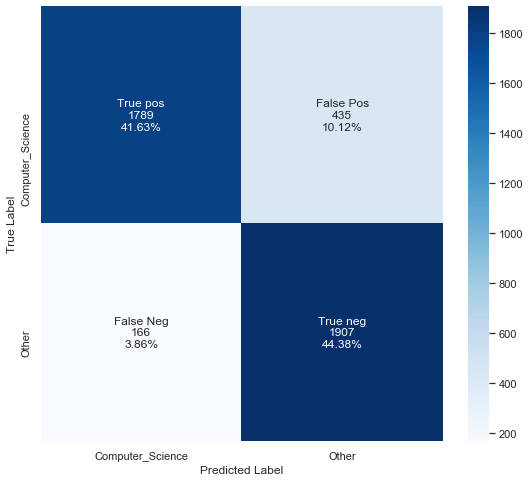

In [104]:
# Naive Bayes on Count Vectors
accuracyN1 = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print( "NB, Count Vectors: ", accuracyN1)

NB, WordLevel TF-IDF:  0.8540842448219688


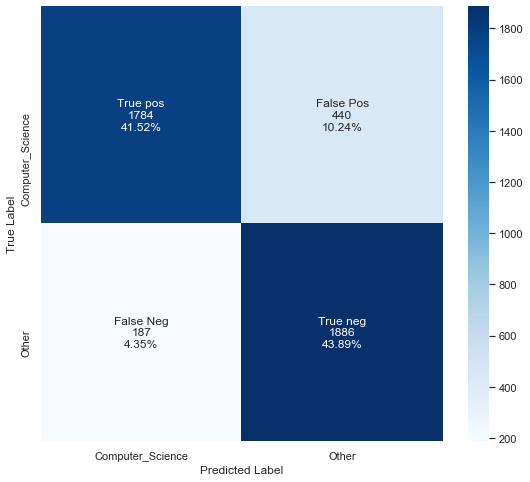

In [105]:
# Naive Bayes on Word Level TF IDF Vectors
accuracyN2 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracyN2)

NB, N-Gram Vectors:  0.8222015359553176


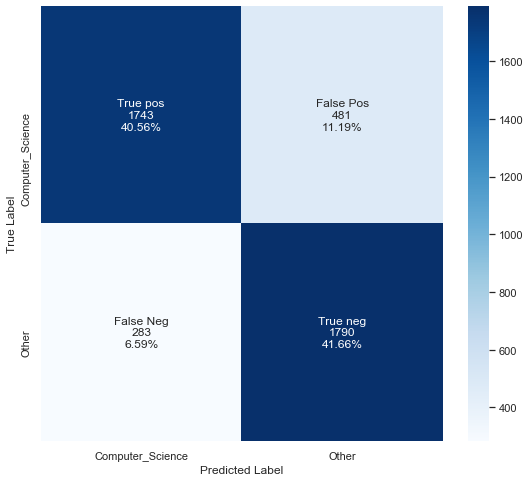

In [106]:
# Naive Bayes on Ngram Level TF IDF Vectors
accuracyN3 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("NB, N-Gram Vectors: ", accuracyN3)

NB, CharLevel Vectors:  0.8298813125436351


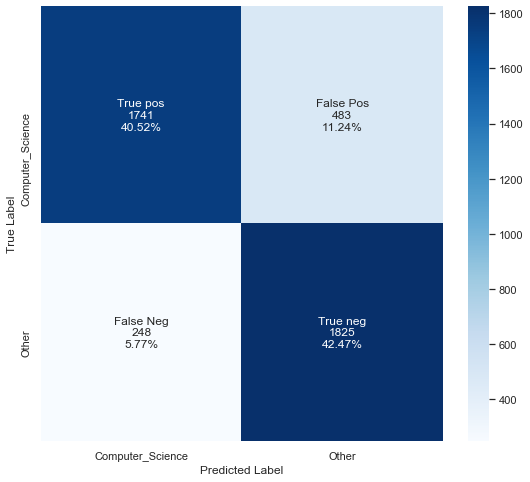

In [107]:
# Naive Bayes on Character Level TF IDF Vectors
accuracyN4 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("NB, CharLevel Vectors: ", accuracyN4)

 # 1.3.2 Logistic Regression

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LR, Count Vectors:  0.8284849895275774


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


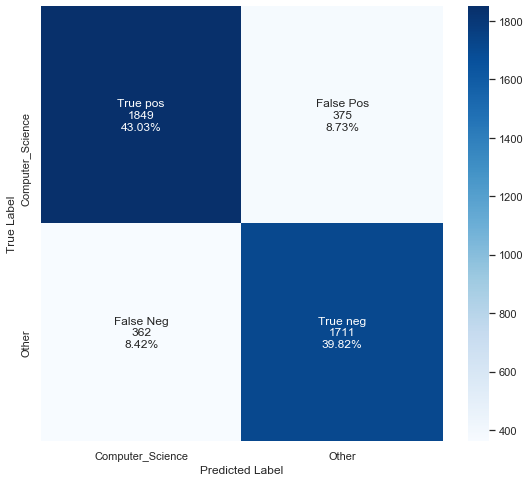

In [108]:
# Linear Classifier on Count Vectors
accuracyL1 = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print ("LR, Count Vectors: ", accuracyL1)

LR, WordLevel TF-IDF:  0.8692110774959274


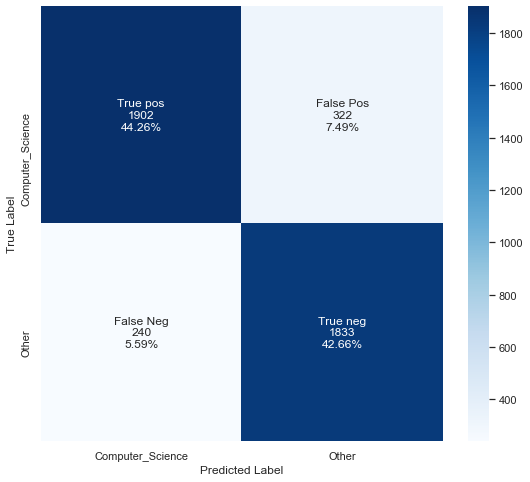

In [109]:
# Linear Classifier on Word Level TF IDF Vectors
accuracyL2 = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("LR, WordLevel TF-IDF: ", accuracyL2)

LR, N-Gram Vectors:  0.8296485920409588


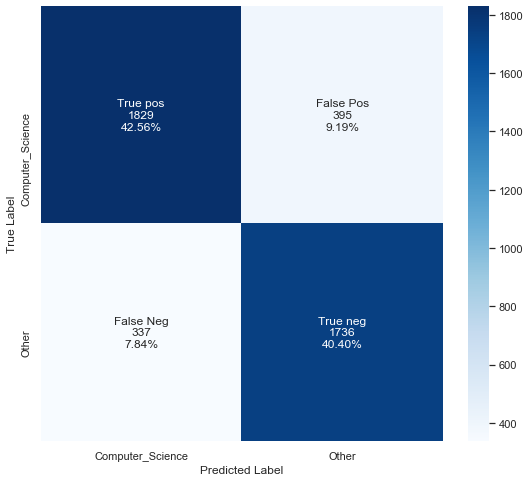

In [110]:
# Linear Classifier on Ngram Level TF IDF Vectors
accuracyL3 = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("LR, N-Gram Vectors: ", accuracyL3)

LR, CharLevel Vectors:  0.8473353502443566


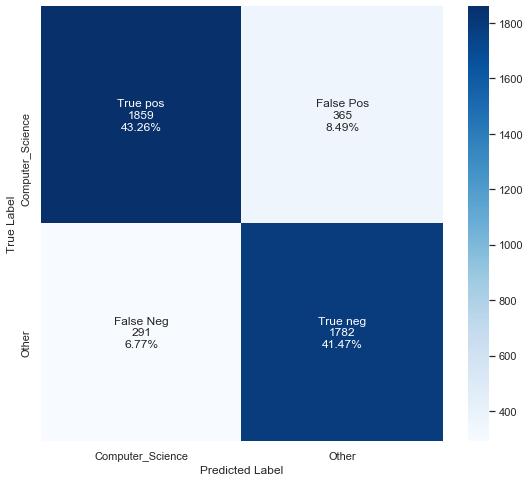

In [111]:
# Linear Classifier on Character Level TF IDF Vectors
accuracyL4 = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("LR, CharLevel Vectors: ", accuracyL4)

 # 1.3.3 Implementing a SVM Model


SVM, Count Vectors:  0.8368629276239237


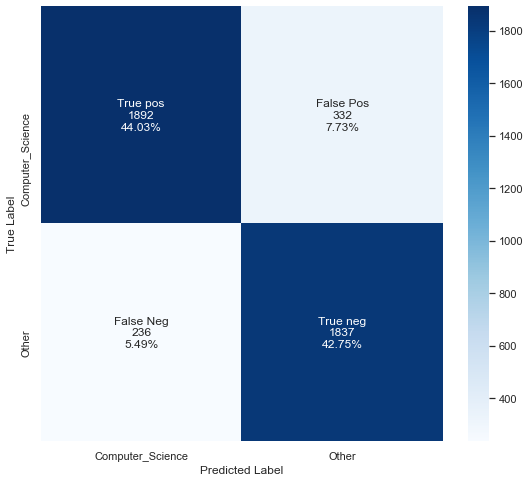

In [112]:
accuracyS1 = train_model(svm.SVC(), xtrain_count, train_y, xvalid_count)
print ("SVM, Count Vectors: ", accuracyS2)

SVM, WordLevel TF-IDF:  0.7216662787991622


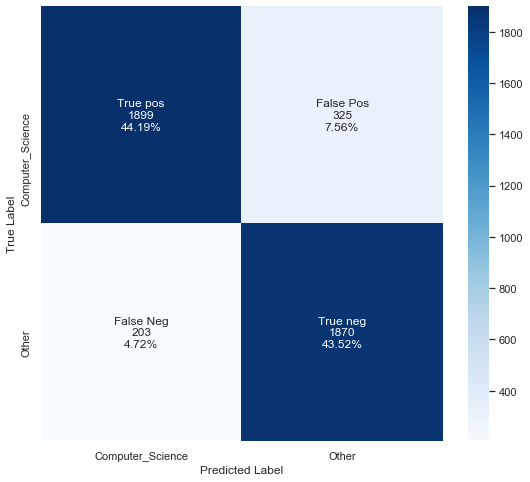

In [113]:
# SVM on Word Level TF IDF Vectors
accuracyS2 = train_model(svm.SVC(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("SVM, WordLevel TF-IDF: ", accuracyS3)

In [143]:
# SVM on Ngram Level TF IDF Vectors
accuracyS3 = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("SVM, N-Gram Vectors: ", accuracyS1)

SVM, N-Gram Vectors:  0.8245287409820805


In [145]:
# SVM on Character Level TF IDF Vectors
accuracyS4 = train_model(svm.SVC(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("SVM, CharLevel Vectors: ", accuracyS4)

SVM, CharLevel Vectors:  0.8187107284151733


# 1.3.4 Calculate the best accurcy in each type 

In [147]:
classification = {0:'Naive bayes',1:'Logistic Regression',2:'Support Vector Classifcation'}
array1= [accuracyN1,accuracyL1,accuracyS1]
acc1 = np.argmax([accuracyN1,accuracyL1,accuracyS1])
print('Best classifier based on accuracy , According to Count Vectors {}'.format(classification[acc1]))
print()
array2= [accuracyN2,accuracyL2,accuracyS2]
acc2 = np.argmax([accuracyN2,accuracyL2,accuracyS2])
print('Best classifier based on accuracy , According to Word Level TF IDF Vectors {}'.format(classification[acc2]))
print()
array3= [accuracyN3,accuracyL3,accuracyS3]
acc3 = np.argmax([accuracyN3,accuracyL3,accuracyS3])
print('Best classifier based on accuracy , According to Ngram Level TF IDF Vectors {}'.format(classification[acc3]))
print()
array4= [accuracyN4,accuracyL4,accuracyS4]
acc4 = np.argmax([accuracyN4,accuracyL4,accuracyS4])
print('Best classifier based on accuracy , According to Character Level TF IDF Vectors  {}'.format(classification[acc4]))
print()

Best classifier based on accuracy , According to Count Vectors Naive bayes

Best classifier based on accuracy , According to Word Level TF IDF Vectors Support Vector Classifcation

Best classifier based on accuracy , According to Ngram Level TF IDF Vectors Support Vector Classifcation

Best classifier based on accuracy , According to Character Level TF IDF Vectors  Support Vector Classifcation



# 1.3.5 Best Model 

In [149]:
best_accurcy_in_each = [array1[acc1] ,array2[acc2] , array3[acc3] , array4[acc4]]
best_ac = np.argmax(best_accurcy_in_each)
AA = 0
MA = 0
if best_ac == 0 :
    print('The Best classifier for this data is {} useing Count Vectors'.format(classification[acc1]))
    print('with an accurcy = ', array1[acc1])
    AA = array1[acc1]
    MA = acc1
elif best_ac == 1 :
    print('The Best classifier for this data is {} useing Word Level TF IDF Vectors'.format(classification[acc2]))
    print('with an accurcy = ', array2[acc2])
    AA = array2[acc2]
    MA = acc2
elif best_ac == 2 :
    print('The Best classifier for this data is {} useing Ngram Level TF IDF Vectors'.format(classification[acc3]))
    print('with an accurcy = ', array3[acc3])
    AA = array3[acc3]
    MA = acc3
else:
    print('The Best classifier for this data is {} useing Character Level TF IDF Vectors'.format(classification[acc4]))
    print('with an accurcy = ', array4[acc4])
    AA = array4[acc4]
    MA = acc4

The Best classifier for this data is Support Vector Classifcation useing Word Level TF IDF Vectors
with an accurcy =  0.8294158715382826


In [151]:
# classification_report(p , m )

# 2- classifiction based in 'Title'


# 2.1 Dataset preparation

In [23]:
df

TITLE  \
0      akari irc asteroid flux catalogu updat diamet ...   
1                     glow gener flow invert x convolut    
2      asymptot behaviour christoffel function unit b...   
3      constraint growth spin supermass black hole hi...   
4      intuit fail assess condit risk exampl frog riddl    
...                                                  ...   
17183       faith invers gener model effect amort infer    
17184  social network analysi oper research industri ...   
17185  quickcast fast effici inter datacent transfer ...   
17186  contemporari machin learn guid practition phys...   
17187              analys soccer game cluster conceptor    

                                                ABSTRACT  Computer_Science  \
0      ['akari', 'irc', 'sky', 'survey', 'provid', 't...                 0   
1      ['flow', 'base', 'gener', 'model', 'dinh', 'et...                 0   
2      ['present', 'famili', 'mutual', 'orthogon', 'p...                 0   
3      ['present', 'second', 'cadenc', 'observ', 'ngc...                 0   
4      ['recent', 'educ', 'initi', 'ted', 'ed', 'publ...                 0   
...                                                  ...               ...   
17183  ['infer', 'amort', 'method', 'share', 'inform'...                 1   
17184  ['studi', 'u', 'oper', 'research', 'industri',...                 1   
17185  ['larg', 'inter', 'datacent', 'transfer', 'cru...                 1   
17186  ['machin', 'learn', 'find', 'increasingli', 'b...                 1   
17187  ['present', 'new', 'approach', 'identifi', 'si...                 1   

       char_count  word_count  \
0              77           8   
1              52           6   
2              97           9   
3             109          11   
4              73           8   
...           ...         ...   
17183          65           7   
17184         103          10   
17185         100          10   
17186          77           7   
17187          52           5   

                                                 combain  
0      ['akari', 'irc', 'sky', 'survey', 'provid', 't...  
1      ['flow', 'base', 'gener', 'model', 'dinh', 'et...  
2      ['present', 'famili', 'mutual', 'orthogon', 'p...  
3      ['present', 'second', 'cadenc', 'observ', 'ngc...  
4      ['recent', 'educ', 'initi', 'ted', 'ed', 'publ...  
...                                                  ...  
17183  ['infer', 'amort', 'method', 'share', 'inform'...  
17184  ['studi', 'u', 'oper', 'research', 'industri',...  
17185  ['larg', 'inter', 'datacent', 'transfer', 'cru...  
17186  ['machin', 'learn', 'find', 'increasingli', 'b...  
17187  ['present', 'new', 'approach', 'identifi', 'si...  

[17188 rows x 6 columns]

In [34]:
for ind in df.index:
    print(df['TITLE'][ind])
    x1 = ast.literal_eval(df['TITLE'][ind])
    s = ""
    sent = []
    for t in x1:
        s = s+t+" "
    df['TITLE'][ind] = s
        

['akari', 'irc', 'asteroid', 'flux', 'catalogu', 'updat', 'diamet', 'albedo']
['glow', 'gener', 'flow', 'invert', 'x', 'convolut']
['asymptot', 'behaviour', 'christoffel', 'function', 'unit', 'ball', 'presenc', 'mass', 'sphere']
['constraint', 'growth', 'spin', 'supermass', 'black', 'hole', 'high', 'cadenc', 'visibl', 'light', 'observ']
['intuit', 'fail', 'assess', 'condit', 'risk', 'exampl', 'frog', 'riddl']
['evolut', 'red', 'supergi', 'supernova']
['algebra', 'descript', 'shape', 'invari', 'revisit']
['transport', 'disord', 'ν', 'fraction', 'quantum', 'hall', 'junction']
['soliton', 'bose', 'einstein', 'condens', 'helicoid', 'spin', 'orbit', 'coupl']
['solv', 'non', 'linear', 'model', 'hiv', 'infect', 'cd', 'cell', 'combin', 'laplac', 'transform', 'homotopi', 'analysi']
['combinator', 'involut', 'divis']
['contribut', 'cellular', 'automata', 'understand', 'corros', 'phenomena']
['gee', 'haw', 'whammi', 'diddl']
['gener', 'adversari', 'network', 'base', 'autoencod', 'applic', 'fault'

D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



['bounded', 'properti', 'function', 'space']
['coher', 'structur', 'spectral', 'energi', 'transfer', 'turbul', 'plasma', 'space', 'filter', 'approach']
['onlin', 'rn', 'remov', 'cryogen', 'distil', 'xenon', 'experi']
['calcul', 'effect', 'interact', 'potenti', 'positron', 'channel', 'ionic', 'crystal']
['fast', 'character', 'segment', 'duplic', 'genom', 'assembl']
['constraint', 'sum', 'neutrino', 'mass', 'use', 'cosmolog', 'data', 'includ', 'latest', 'extend', 'baryon', 'oscil', 'spectroscop', 'survey', 'dr', 'quasar', 'sampl']
['high', 'frequenc', 'analysi', 'effect', 'interact', 'bandwidth', 'transient', 'state', 'monocycl', 'puls', 'excit', 'extend', 'hubbard', 'model']
['probabl', 'evolut', 'trajectori', 'genet', 'regulatori', 'system', 'excit', 'stabl', 'lévi', 'nois']
['evolut', 'temperatur', 'field', 'caviti', 'collaps', 'liquid', 'nitromethan', 'part', 'ii', 'reactiv', 'case']
['phase', 'encod', 'hyperpolar', 'nanodiamond', 'magnet', 'reson', 'imag']
['yamab', 'soliton', 'thr

we do the spliting of the data : train and test and we transofrm the classes.

In [ ]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['TITLE'], df['Computer_Science'])

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

# 2.2. Feature Engineering

# 2.2.1 Count Vectors as features

In [ ]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df['TITLE'],)



# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [160]:
word_freq_df = pd.DataFrame(xtrain_count.toarray(), columns=count_vect.get_feature_names())
top_words_df = pd.DataFrame(word_freq_df.sum()).sort_values(0, ascending=False)

This is a list contian each word in abstract and where it's appear in which row 

In [161]:
word_freq_df[:3]

aact  aad  aaria  ab  abalon  abc  abcd  abdollahi  abdomin  abel  ...  μm  \
0     0    0      0   0       0    0     0          0        0     0  ...   0   
1     0    0      0   0       0    0     0          0        0     0  ...   0   
2     0    0      0   0       0    0     0          0        0     0  ...   0   

   ν  ξ  π  σ  τ  φ  χ  ψ  ω  
0  0  0  0  0  0  0  0  0  0  
1  0  0  0  0  0  0  0  0  0  
2  0  0  0  0  0  0  0  0  0  

[3 rows x 11853 columns]

This list contin the most frequent word in abstract, displyes in Descending order

In [162]:
top_words_df

0
network     1271
model       1204
learn       1144
use          774
base         712
...          ...
liar           0
liber          0
delafossit     0
ski            0
pentanol       0

[11853 rows x 1 columns]

In [163]:
ds = top_words_df[:15]
sns.set(rc={'figure.figsize':(15,15)})

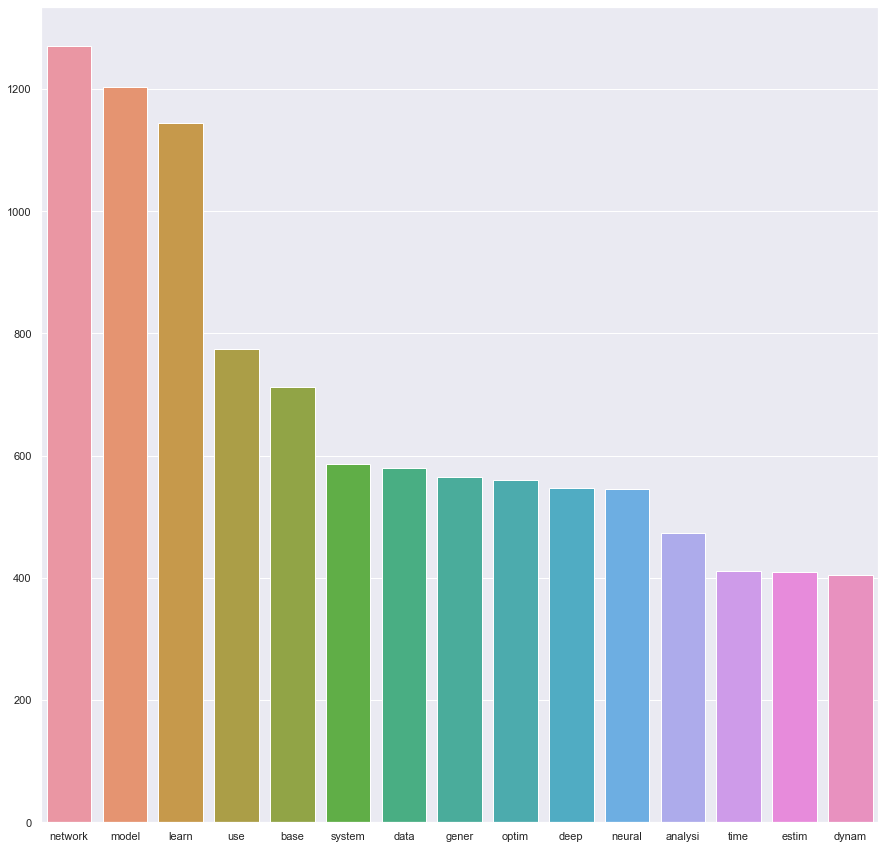

In [164]:
sns.barplot(x=list(ds.index),y=list(ds[0]))


plot of the most frequnet word with the number of frequency.

# 2.2.2 TF-IDF Vectors as features

a. Word Level TF-IDF : Matrix representing tf-idf scores of every term in different documents     
b. N-gram Level TF-IDF : N-grams are the combination of N terms together. This Matrix representing tf-idf     scores of N-grams            
      c. Character Level TF-IDF : Matrix representing tf-idf scores of character level n-grams in the corpus    

In [165]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['TITLE'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(df['TITLE'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(df['TITLE'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:501: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


# 2.2.3 Text / NLP based features

In [17]:
df['char_count'] = df['TITLE'].apply(len)
df['word_count'] = df['TITLE'].apply(lambda x: len(x.split()))


In [18]:
df

TITLE  \
0      ['akari', 'irc', 'asteroid', 'flux', 'catalogu...   
1      ['glow', 'gener', 'flow', 'invert', 'x', 'conv...   
2      ['asymptot', 'behaviour', 'christoffel', 'func...   
3      ['constraint', 'growth', 'spin', 'supermass', ...   
4      ['intuit', 'fail', 'assess', 'condit', 'risk',...   
...                                                  ...   
17183  ['faith', 'invers', 'gener', 'model', 'effect'...   
17184  ['social', 'network', 'analysi', 'oper', 'rese...   
17185  ['quickcast', 'fast', 'effici', 'inter', 'data...   
17186  ['contemporari', 'machin', 'learn', 'guid', 'p...   
17187  ['analys', 'soccer', 'game', 'cluster', 'conce...   

                                                ABSTRACT  Computer_Science  \
0      ['akari', 'irc', 'sky', 'survey', 'provid', 't...                 0   
1      ['flow', 'base', 'gener', 'model', 'dinh', 'et...                 0   
2      ['present', 'famili', 'mutual', 'orthogon', 'p...                 0   
3      ['present', 'second', 'cadenc', 'observ', 'ngc...                 0   
4      ['recent', 'educ', 'initi', 'ted', 'ed', 'publ...                 0   
...                                                  ...               ...   
17183  ['infer', 'amort', 'method', 'share', 'inform'...                 1   
17184  ['studi', 'u', 'oper', 'research', 'industri',...                 1   
17185  ['larg', 'inter', 'datacent', 'transfer', 'cru...                 1   
17186  ['machin', 'learn', 'find', 'increasingli', 'b...                 1   
17187  ['present', 'new', 'approach', 'identifi', 'si...                 1   

       char_count  word_count  
0              77           8  
1              52           6  
2              97           9  
3             109          11  
4              73           8  
...           ...         ...  
17183          65           7  
17184         103          10  
17185         100          10  
17186          77           7  
17187          52           5  

[17188 rows x 5 columns]

# 2.3. Model Building

Confusion matrix method

In [168]:
def Con_Mat(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
  
    cf_matrix = confusion_matrix(y_true=valid_y, y_pred=predictions)
    group_names = ['True pos','False Pos','False Neg','True neg']
    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(9,8))

    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',xticklabels=['Computer_Science', 'Other'], yticklabels=['Computer_Science', 'Other'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label');

train model method

In [169]:

def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

 # 2.3.1 Naive Bayes


In [170]:
# Naive Bayes on Count Vectors
accuracyN1 = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print( "NB, Count Vectors: ", accuracyN1)

NB, Count Vectors:  0.8291831510356062


In [171]:
# Naive Bayes on Word Level TF IDF Vectors
accuracyN2 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracyN2)

NB, WordLevel TF-IDF:  0.8277868280195485


In [172]:
# Naive Bayes on Ngram Level TF IDF Vectors
accuracyN3 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("NB, N-Gram Vectors: ", accuracyN3)

NB, N-Gram Vectors:  0.6809401908308121


In [173]:
# Naive Bayes on Character Level TF IDF Vectors
accuracyN4 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("NB, CharLevel Vectors: ", accuracyN4)

NB, CharLevel Vectors:  0.7973004421689551


 # 2.3.2 Logistic Regression

In [174]:
# Linear Classifier on Count Vectors
accuracyL1 = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print ("LR, Count Vectors: ", accuracyL1)

LR, Count Vectors:  0.8084710262974169


In [175]:
# Linear Classifier on Word Level TF IDF Vectors
accuracyL2 = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("LR, WordLevel TF-IDF: ", accuracyL2)

LR, WordLevel TF-IDF:  0.8198743309285548


In [176]:
# Linear Classifier on Ngram Level TF IDF Vectors
accuracyL3 = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("LR, N-Gram Vectors: ", accuracyL3)

LR, N-Gram Vectors:  0.725622527344659


In [177]:
# Linear Classifier on Character Level TF IDF Vectors
accuracyL4 = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("LR, CharLevel Vectors: ", accuracyL4)

LR, CharLevel Vectors:  0.8089364673027694


 # 2.3.3 Implementing a SVM Model


In [178]:
accuracyS1 = train_model(svm.SVC(), xtrain_count, train_y, xvalid_count)
print ("SVM, Count Vectors: ", accuracyS2)

SVM, Count Vectors:  0.8294158715382826


In [179]:
# SVM on Word Level TF IDF Vectors
accuracyS2 = train_model(svm.SVC(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("SVM, WordLevel TF-IDF: ", accuracyS3)

SVM, WordLevel TF-IDF:  0.7281824528740982


In [180]:
# SVM on Ngram Level TF IDF Vectors
accuracyS3 = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("SVM, N-Gram Vectors: ", accuracyS1)

SVM, N-Gram Vectors:  0.8245287409820805


In [181]:
# SVM on Character Level TF IDF Vectors
accuracyS4 = train_model(svm.SVC(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("SVM, CharLevel Vectors: ", accuracyS4)

SVM, CharLevel Vectors:  0.8187107284151733


# 2.3.4 Calculate the best accurcy in each type 

In [182]:
classification = {0:'Naive bayes',1:'Logistic Regression',2:'Support Vector Classifcation'}
array1= [accuracyN1,accuracyL1,accuracyS1]
acc1 = np.argmax([accuracyN1,accuracyL1,accuracyS1])
print('Best classifier based on accuracy , According to Count Vectors {}'.format(classification[acc1]))
print()
array2= [accuracyN2,accuracyL2,accuracyS2]
acc2 = np.argmax([accuracyN2,accuracyL2,accuracyS2])
print('Best classifier based on accuracy , According to Word Level TF IDF Vectors {}'.format(classification[acc2]))
print()
array3= [accuracyN3,accuracyL3,accuracyS3]
acc3 = np.argmax([accuracyN3,accuracyL3,accuracyS3])
print('Best classifier based on accuracy , According to Ngram Level TF IDF Vectors {}'.format(classification[acc3]))
print()
array4= [accuracyN4,accuracyL4,accuracyS4]
acc4 = np.argmax([accuracyN4,accuracyL4,accuracyS4])
print('Best classifier based on accuracy , According to Character Level TF IDF Vectors  {}'.format(classification[acc4]))
print()

Best classifier based on accuracy , According to Count Vectors Naive bayes

Best classifier based on accuracy , According to Word Level TF IDF Vectors Support Vector Classifcation

Best classifier based on accuracy , According to Ngram Level TF IDF Vectors Support Vector Classifcation

Best classifier based on accuracy , According to Character Level TF IDF Vectors  Support Vector Classifcation



# 2.3.5 Best Model 

In [183]:
best_accurcy_in_each = [array1[acc1] ,array2[acc2] , array3[acc3] , array4[acc4]]
best_ac = np.argmax(best_accurcy_in_each)
AT = 0
MT = 0
if best_ac == 0 :
    print('The Best classifier for this data is {} useing Count Vectors'.format(classification[acc1]))
    print('with an accurcy = ', array1[acc1])
    AT = array1[acc1]
    MT = acc1
elif best_ac == 1 :
    print('The Best classifier for this data is {} useing Word Level TF IDF Vectors'.format(classification[acc2]))
    print('with an accurcy = ', array2[acc2])
    AT = array2[acc2]
    MT = acc2
elif best_ac == 2 :
    print('The Best classifier for this data is {} useing Ngram Level TF IDF Vectors'.format(classification[acc3]))
    print('with an accurcy = ', array3[acc3])
    AT = array3[acc3]
    MT = acc3
else:
    print('The Best classifier for this data is {} useing Character Level TF IDF Vectors'.format(classification[acc4]))
    print('with an accurcy = ', array4[acc4])
    AT = array4[acc4]
    MT = acc4

The Best classifier for this data is Support Vector Classifcation useing Word Level TF IDF Vectors
with an accurcy =  0.8294158715382826


# 3- classifiction based in Combination of 'Abstract' and 'Tiltle'

# 3.1 Dataset preparation

forming the combined strting of title and abstrct 

In [40]:
 df['combain'] = ''
for i in range(len(df)):

    df['combain'][i] = df['ABSTRACT'][i] + " " + df['TITLE'][i]

D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [41]:
df

TITLE  \
0      akari irc asteroid flux catalogu updat diamet ...   
1                     glow gener flow invert x convolut    
2      asymptot behaviour christoffel function unit b...   
3      constraint growth spin supermass black hole hi...   
4      intuit fail assess condit risk exampl frog riddl    
...                                                  ...   
17183       faith invers gener model effect amort infer    
17184  social network analysi oper research industri ...   
17185  quickcast fast effici inter datacent transfer ...   
17186  contemporari machin learn guid practition phys...   
17187              analys soccer game cluster conceptor    

                                                ABSTRACT  Computer_Science  \
0      akari irc sky survey provid twenti thousand th...                 0   
1      flow base gener model dinh et al conceptu attr...                 0   
2      present famili mutual orthogon polynomi unit b...                 0   
3      present second cadenc observ ngc chimera instr...                 0   
4      recent educ initi ted ed publish popular brain...                 0   
...                                                  ...               ...   
17183  infer amort method share inform across multipl...                 1   
17184  studi u oper research industri system engin or...                 1   
17185  larg inter datacent transfer crucial cloud ser...                 1   
17186  machin learn find increasingli broad applic ph...                 1   
17187  present new approach identifi situat behaviour...                 1   

       char_count  word_count  \
0            1156         178   
1             438          66   
2             322          42   
3            1003         157   
4             541          83   
...           ...         ...   
17183         614          88   
17184         807         120   
17185         763         115   
17186         853         123   
17187         796         115   

                                                 combain  
0      akari irc sky survey provid twenti thousand th...  
1      flow base gener model dinh et al conceptu attr...  
2      present famili mutual orthogon polynomi unit b...  
3      present second cadenc observ ngc chimera instr...  
4      recent educ initi ted ed publish popular brain...  
...                                                  ...  
17183  infer amort method share inform across multipl...  
17184  studi u oper research industri system engin or...  
17185  larg inter datacent transfer crucial cloud ser...  
17186  machin learn find increasingli broad applic ph...  
17187  present new approach identifi situat behaviour...  

[17188 rows x 6 columns]

we do the spliting of the data : train and test and we transofrm the classes.

In [186]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['combain'], df['Computer_Science'])

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

# 3.2 Feature Engineering

# 3.2.1 Count Vectors as features

In [187]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df['combain'],)



# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

In [188]:
word_freq_df = pd.DataFrame(xtrain_count.toarray(), columns=count_vect.get_feature_names())
top_words_df = pd.DataFrame(word_freq_df.sum()).sort_values(0, ascending=False)

This is a list contian each word in abstract and where it's appear in which row 

In [189]:
word_freq_df[:3]

a  aa  aaa  aaai  aabb  aact  aad  aae  aah  aakn  ...  μm  ν  ξ  π  σ  τ  \
0  0   0    0     0     0     0    0    0    0     0  ...   0  0  0  0  0  0   
1  0   0    0     0     0     0    0    0    0     0  ...   0  0  0  0  0  0   
2  0   0    0     0     0     0    0    0    0     0  ...   0  0  0  0  0  0   

   φ  χ  ψ  ω  
0  0  0  0  0  
1  0  0  0  0  
2  0  0  0  0  

[3 rows x 31623 columns]

This list contin the most frequent word in abstract, displyes in Descending order

In [190]:
top_words_df

0
model    12761
use      11881
network   8142
data      7899
method    7685
...        ...
rivero       0
nbsn         0
tasep        0
incpcp       0
stilwel      0

[31623 rows x 1 columns]

In [191]:
ds = top_words_df[:15]
sns.set(rc={'figure.figsize':(15,15)})

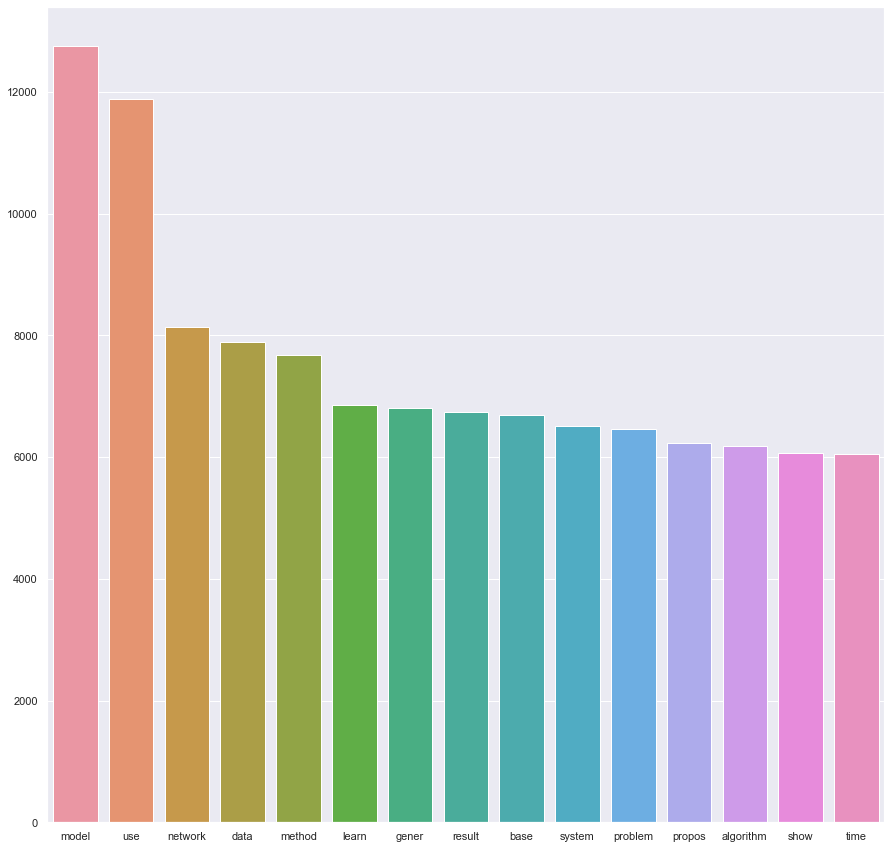

In [192]:
sns.barplot(x=list(ds.index),y=list(ds[0]))


plot of the most frequnet word with the number of frequency.

# 3.2.2 TF-IDF Vectors as features

a. Word Level TF-IDF : Matrix representing tf-idf scores of every term in different documents     
b. N-gram Level TF-IDF : N-grams are the combination of N terms together. This Matrix representing tf-idf     scores of N-grams            
      c. Character Level TF-IDF : Matrix representing tf-idf scores of character level n-grams in the corpus    

In [193]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['combain'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(df['combain'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(df['combain'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:501: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


# 3.2.3 Text / NLP based features

In [42]:
df['char_count'] = df['combain'].apply(len)
df['word_count'] = df['combain'].apply(lambda x: len(x.split()))


In [43]:
df

TITLE  \
0      akari irc asteroid flux catalogu updat diamet ...   
1                     glow gener flow invert x convolut    
2      asymptot behaviour christoffel function unit b...   
3      constraint growth spin supermass black hole hi...   
4      intuit fail assess condit risk exampl frog riddl    
...                                                  ...   
17183       faith invers gener model effect amort infer    
17184  social network analysi oper research industri ...   
17185  quickcast fast effici inter datacent transfer ...   
17186  contemporari machin learn guid practition phys...   
17187              analys soccer game cluster conceptor    

                                                ABSTRACT  Computer_Science  \
0      akari irc sky survey provid twenti thousand th...                 0   
1      flow base gener model dinh et al conceptu attr...                 0   
2      present famili mutual orthogon polynomi unit b...                 0   
3      present second cadenc observ ngc chimera instr...                 0   
4      recent educ initi ted ed publish popular brain...                 0   
...                                                  ...               ...   
17183  infer amort method share inform across multipl...                 1   
17184  studi u oper research industri system engin or...                 1   
17185  larg inter datacent transfer crucial cloud ser...                 1   
17186  machin learn find increasingli broad applic ph...                 1   
17187  present new approach identifi situat behaviour...                 1   

       char_count  word_count  \
0            1210         186   
1             473          72   
2             393          51   
3            1080         168   
4             591          91   
...           ...         ...   
17183         659          95   
17184         881         130   
17185         834         125   
17186         910         130   
17187         834         120   

                                                 combain  
0      akari irc sky survey provid twenti thousand th...  
1      flow base gener model dinh et al conceptu attr...  
2      present famili mutual orthogon polynomi unit b...  
3      present second cadenc observ ngc chimera instr...  
4      recent educ initi ted ed publish popular brain...  
...                                                  ...  
17183  infer amort method share inform across multipl...  
17184  studi u oper research industri system engin or...  
17185  larg inter datacent transfer crucial cloud ser...  
17186  machin learn find increasingli broad applic ph...  
17187  present new approach identifi situat behaviour...  

[17188 rows x 6 columns]

# 3.3. Model Building

Confusion matrix method

In [196]:
def Con_Mat(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
  
    cf_matrix = confusion_matrix(y_true=valid_y, y_pred=predictions)
    group_names = ['True pos','False Pos','False Neg','True neg']
    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(9,8))

    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',xticklabels=['Computer_Science', 'Other'], yticklabels=['Computer_Science', 'Other'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label');

train model method

In [197]:

def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

 # 3.3.1 Naive Bayes


In [198]:
# Naive Bayes on Count Vectors
accuracyN1 = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print( "NB, Count Vectors: ", accuracyN1)

# Naive Bayes on Word Level TF IDF Vectors
accuracyN2 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracyN2)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracyN3 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("NB, N-Gram Vectors: ", accuracyN3)

# Naive Bayes on Character Level TF IDF Vectors
accuracyN4 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("NB, CharLevel Vectors: ", accuracyN4)

NB, Count Vectors:  0.8654875494531068
NB, WordLevel TF-IDF:  0.8575750523621131
NB, N-Gram Vectors:  0.8401210146613917
NB, CharLevel Vectors:  0.836397486618571


#  3.3.2 Logistic Regression

In [199]:
# Linear Classifier on Count Vectors
accuracyL1 = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print ("LR, Count Vectors: ", accuracyL1)

LR, Count Vectors:  0.8408191761694205


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [200]:
# Linear Classifier on Word Level TF IDF Vectors
accuracyL2 = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("LR, WordLevel TF-IDF: ", accuracyL2)

LR, WordLevel TF-IDF:  0.8689783569932511


In [201]:
# Linear Classifier on Ngram Level TF IDF Vectors
accuracyL3 = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("LR, N-Gram Vectors: ", accuracyL3)

LR, N-Gram Vectors:  0.8398882941587154


In [202]:
# Linear Classifier on Character Level TF IDF Vectors
accuracyL4 = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("LR, CharLevel Vectors: ", accuracyL4)

LR, CharLevel Vectors:  0.8564114498487316


#  3.3.3 Implementing a SVM Model


In [203]:
accuracyS1 = train_model(svm.SVC(), xtrain_count, train_y, xvalid_count)
print ("SVM, Count Vectors: ", accuracyS2)

SVM, Count Vectors:  0.8294158715382826


In [204]:
# SVM on Word Level TF IDF Vectors
accuracyS2 = train_model(svm.SVC(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("SVM, WordLevel TF-IDF: ", accuracyS3)

SVM, WordLevel TF-IDF:  0.7281824528740982


In [205]:
# SVM on Ngram Level TF IDF Vectors
accuracyS3 = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("SVM, N-Gram Vectors: ", accuracyS1)

SVM, N-Gram Vectors:  0.8682801954852223


In [206]:
# SVM on Character Level TF IDF Vectors
accuracyS4 = train_model(svm.SVC(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print ("SVM, CharLevel Vectors: ", accuracyS4)

SVM, CharLevel Vectors:  0.8645566674424017


# 3.3.4 Calculate the best accurcy in each type 

In [207]:
classification = {0:'Naive bayes',1:'Logistic Regression',2:'Support Vector Classifcation'}
array1= [accuracyN1,accuracyL1,accuracyS1]
acc1 = np.argmax([accuracyN1,accuracyL1,accuracyS1])
print('Best classifier based on accuracy , According to Count Vectors {}'.format(classification[acc1]))
print()
array2= [accuracyN2,accuracyL2,accuracyS2]
acc2 = np.argmax([accuracyN2,accuracyL2,accuracyS2])
print('Best classifier based on accuracy , According to Word Level TF IDF Vectors {}'.format(classification[acc2]))
print()
array3= [accuracyN3,accuracyL3,accuracyS3]
acc3 = np.argmax([accuracyN3,accuracyL3,accuracyS3])
print('Best classifier based on accuracy , According to Ngram Level TF IDF Vectors {}'.format(classification[acc3]))
print()
array4= [accuracyN4,accuracyL4,accuracyS4]
acc4 = np.argmax([accuracyN4,accuracyL4,accuracyS4])
print('Best classifier based on accuracy , According to Character Level TF IDF Vectors  {}'.format(classification[acc4]))
print()

Best classifier based on accuracy , According to Count Vectors Support Vector Classifcation

Best classifier based on accuracy , According to Word Level TF IDF Vectors Support Vector Classifcation

Best classifier based on accuracy , According to Ngram Level TF IDF Vectors Naive bayes

Best classifier based on accuracy , According to Character Level TF IDF Vectors  Support Vector Classifcation



# 3.3.5 Best Model 

In [208]:
best_accurcy_in_each = [array1[acc1] ,array2[acc2] , array3[acc3] , array4[acc4]]
best_ac = np.argmax(best_accurcy_in_each)
AB = 0
MB = 0
if best_ac == 0 :
    print('The Best classifier for this data is {} useing Count Vectors'.format(classification[acc1]))
    print('with an accurcy = ', array1[acc1])
    AB = array1[acc1]
    MB = acc1
elif best_ac == 1 :
    print('The Best classifier for this data is {} useing Word Level TF IDF Vectors'.format(classification[acc2]))
    print('with an accurcy = ', array2[acc2])
    AB = array2[acc2]
    MB = acc2
elif best_ac == 2 :
    print('The Best classifier for this data is {} useing Ngram Level TF IDF Vectors'.format(classification[acc3]))
    print('with an accurcy = ', array3[acc3])
    AB = array3[acc3]
    MB = acc3
else:
    print('The Best classifier for this data is {} useing Character Level TF IDF Vectors'.format(classification[acc4]))
    print('with an accurcy = ', array4[acc4])
    AB = array4[acc4]
    MB = acc4

The Best classifier for this data is Support Vector Classifcation useing Word Level TF IDF Vectors
with an accurcy =  0.8752618105655108


# Best data entery/selection

What the best 'Data input(column)' for classifiction the research to computer Science or not 

In [211]:
bestB = [AA , AT , AB]
bestInd = np.argmax(bestB)
if bestInd == 0 :
    print("The best data column needed for classifiction is only the 'Abstract' of the researsh")
    print()
    print("Accurcy = " , AA)
    print()
    print("Useing {} model".format(classification[MA]))
elif bestInd == 1 :
    print("The best data column needed for classifiction is only the 'Title' of the researsh")
    print()
    print("Accurcy = " , AT)
    print()
    print("Useing {} model".format(classification[MT]))
else :
    print("The best data column needed for classifiction is Combinetion of the 'Title' and 'Abstract' of the researsh")
    print()
    print("Accurcy = " , AB)
    print()
    print("Useing {} model".format(classification[MB]))

The best data column needed for classifiction is Combinetion of the 'Title' and 'Abstract' of the researsh

Accurcy =  0.8752618105655108

Useing Support Vector Classifcation model
